In [ ]:
pip install qiskit

In [299]:
import numpy as np
import pandas as pd

Reading the dataset 

In [300]:
#read the dsataset
X=pd.read_csv('train.csv')
Y=pd.read_csv('test.csv')
X=pd.DataFrame(X)
Y=pd.DataFrame (Y)

Data Exploration 

In [301]:
#Data exploration 
print(X.shape)
print(Y.shape)
X.head(10)

(891, 12)
(418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [302]:
# CHECK THE NULL VLAUE AND CLEAN THE DATASET
print(X.isnull().values.any())
print(X.isnull().sum())
print(Y.isnull().values.any())
print(Y.isnull().sum())


True
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
True
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [303]:
#DELETING UNWANTED COLOUMNS  AND THE NULL VALUES
X=X.drop(['Name','Ticket','Age','Cabin','Embarked'], axis=1)
Y=Y.drop(['Name','Ticket' ,'Age','Cabin','Embarked'], axis=1)


In [304]:
#ENCODING  THE Sex COLOUMN
title_map={'male':1, 
           'female':0}
X["Sex"]=X["Sex"].map(title_map)
Y["Sex"]=Y["Sex"].map(title_map)
# FILLING THE NULL VALUE
Y['Fare'].fillna((X['Fare'].mean()), inplace=True)

Choosing the target and the features

In [305]:
# SPILTING THE DATASET AND CHOOSING THE TARGET AND THE FEATURES 
from sklearn.model_selection import train_test_split
Y=X['Survived']
X=X.drop(['Survived'],axis=1)
X.shape

(891, 6)

In [306]:
#REDUCING THE FEAUTRES INTO 3 UOSNG  QAUNATUM PCA
n_components=2
from sklearn.decomposition import PCA
pca = PCA(n_components=n_components)
X = pca.fit_transform(X)

In [307]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=50,test_size=10,random_state=666)

In [308]:
from sklearn.preprocessing import StandardScaler
# Now we standarize for gaussian around 0 with unit variance
std_scale = StandardScaler().fit(x_train)
x_train = std_scale.transform(x_train)
x_test = std_scale.transform(x_test)

In [309]:
import numpy as np
from qiskit import BasicAer
from qiskit.circuit.library import ZZFeatureMap ,ZFeatureMap
from qiskit.utils import QuantumInstance, algorithm_globals
from qiskit_machine_learning.algorithms import QSVC
from qiskit_machine_learning.kernels import QuantumKernel

In [310]:
seed = 12345
algorithm_globals.random_seed = seed

feature_dim=2
feature_map_1 = ZFeatureMap(feature_dimension=feature_dim,
                                 reps=2)
feature_map_2 = ZZFeatureMap(feature_dimension=feature_dim,
                                 reps=2)
backend = QuantumInstance(BasicAer.get_backend('qasm_simulator'), shots=1024,
                                seed_simulator=seed, seed_transpiler=seed)

kernel1 = QuantumKernel(feature_map=feature_map_1, quantum_instance=backend)

kernel2 = QuantumKernel(feature_map=feature_map_2, quantum_instance=backend)

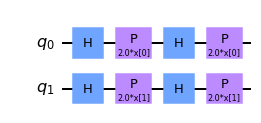

In [311]:
feature_map_1.draw('mpl')

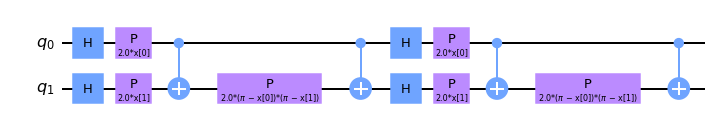

In [312]:
feature_map_2.draw('mpl')

In [313]:

qsvc = QSVC(quantum_kernel=kernel1)
qsvc.fit(x_train, y_train)
qsvc_score = qsvc.score(x_test,y_test)
y_pridct=qsvc.predict (y_test)
print(f'QSVC classification test score with Zfeature: {qsvc_score }')

qsvc = QSVC(quantum_kernel=kernel2)
qsvc.fit(x_train, y_train)
qsvc_score = qsvc.score(x_test,y_test)
y_pridct=qsvc.predict (y_test)
print(f'QSVC classification test score with ZZfeature: {qsvc_score }')


QSVC classification test score with Zfeature: 0.6
QSVC classification test score with ZZfeature: 0.8
